<H1>HEART FAILURE PREDICTION</H1>

In [76]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy import stats

In [78]:
a=pd.read_csv("E:/VB/heart_failure_clinical_records_dataset.csv")
a.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [41]:
a.shape

(299, 13)

In [42]:
a.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [43]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<H1>To Check Null</H1>

In [44]:
a.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
a.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<H1>Age</H1>

{'whiskers': [<matplotlib.lines.Line2D at 0x22c19e57ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x22c19e63640>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c19e57b20>],
 'medians': [<matplotlib.lines.Line2D at 0x22c19e63d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c19e72130>],
 'means': []}

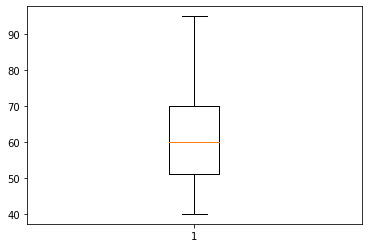

In [46]:
plt.boxplot(a.age)

<H1>Anaemia</H1>

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='anaemia', ylabel='count'>

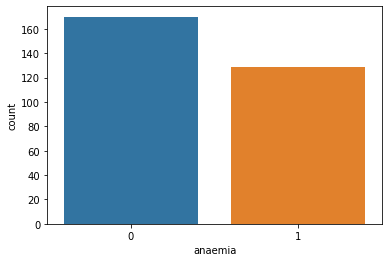

In [47]:
sns.countplot(a.anaemia)

<H1>Creatinine Phosphokinase</H1>

{'whiskers': [<matplotlib.lines.Line2D at 0x22c19f224f0>,
 'caps': [<matplotlib.lines.Line2D at 0x22c19f22c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c19f22160>],
 'medians': [<matplotlib.lines.Line2D at 0x22c19f2b3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c19f2b730>],
 'means': []}

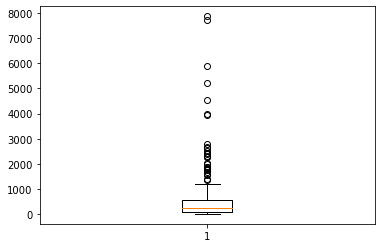

In [48]:
plt.boxplot(a.creatinine_phosphokinase)

In [49]:
cQ1=a.creatinine_phosphokinase.quantile(0.25)
print(cQ1)
cQ2=a.creatinine_phosphokinase.quantile(0.50)
print(cQ2)
cQ3=a.creatinine_phosphokinase.quantile(0.75)
print(cQ3)
cIQR=cQ3-cQ1
print(cIQR)
cupper_extreme=cQ3+1.5*cIQR
print(cupper_extreme)
clower_extreme=cQ1-1.5*cIQR
print(clower_extreme)

116.5
250.0
582.0
465.5
1280.25
-581.75


C:\Users\SANJAY\AppData\Local\Temp/ipykernel_1584/1215262143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.creatinine_phosphokinase[a.creatinine_phosphokinase>cupper_extreme]=cupper_extreme
C:\Users\SANJAY\AppData\Local\Temp/ipykernel_1584/1215262143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.creatinine_phosphokinase[a.creatinine_phosphokinase<clower_extreme]=clower_extreme


{'whiskers': [<matplotlib.lines.Line2D at 0x22c19f95190>,
 'caps': [<matplotlib.lines.Line2D at 0x22c19f958b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c19f84dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x22c19f95fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c19fa03a0>],
 'means': []}

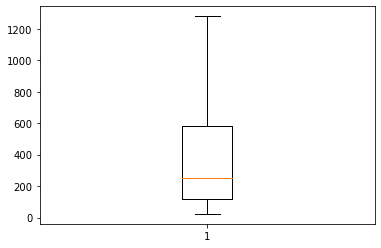

In [50]:
a.creatinine_phosphokinase[a.creatinine_phosphokinase>cupper_extreme]=cupper_extreme
a.creatinine_phosphokinase[a.creatinine_phosphokinase<clower_extreme]=clower_extreme
plt.boxplot(a.creatinine_phosphokinase)

<H1>Diabetes</H1>

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes', ylabel='count'>

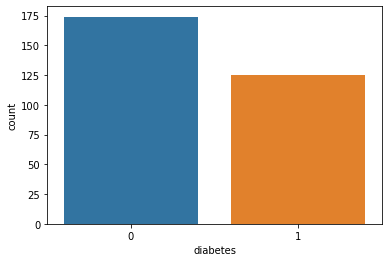

In [51]:
sns.countplot(a.diabetes)

<H1>Ejection Fraction</H1>

{'whiskers': [<matplotlib.lines.Line2D at 0x22c1a04c6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22c1a04cdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c1a04c2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x22c1a057520>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c1a0578b0>],
 'means': []}

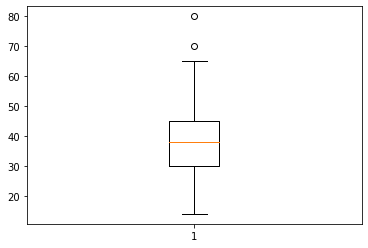

In [52]:
plt.boxplot(a.ejection_fraction)

<H1>High Blood Pressure</H1>

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

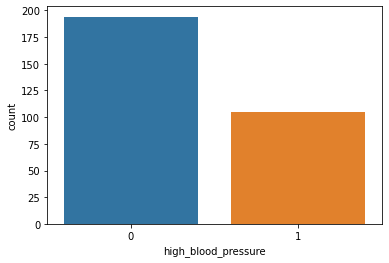

In [53]:
sns.countplot(a.high_blood_pressure)

<H1>Platelets</H1>

{'whiskers': [<matplotlib.lines.Line2D at 0x22c1a10b880>,
 'caps': [<matplotlib.lines.Line2D at 0x22c1a10bfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c1a10b4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x22c1a118700>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c1a118a90>],
 'means': []}

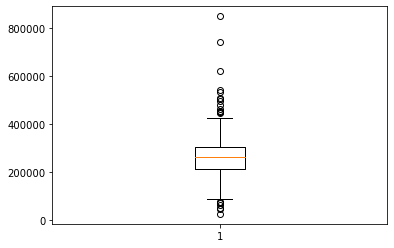

In [54]:
plt.boxplot(a.platelets)

In [55]:
pQ1=a.platelets.quantile(0.25)
print(pQ1)
pQ2=a.platelets.quantile(0.50)
print(pQ2)
pQ3=a.platelets.quantile(0.75)
print(pQ3)
pIQR=pQ3-pQ1
print(pIQR)
pupper_extreme=pQ3+1.5*pIQR
print(pupper_extreme)
plower_extreme=pQ1-1.5*pIQR
print(plower_extreme)

212500.0
262000.0
303500.0
91000.0
440000.0
76000.0


C:\Users\SANJAY\AppData\Local\Temp/ipykernel_1584/1440952322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.platelets[a.platelets>pupper_extreme]=pupper_extreme
C:\Users\SANJAY\AppData\Local\Temp/ipykernel_1584/1440952322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.platelets[a.platelets<plower_extreme]=plower_extreme


{'whiskers': [<matplotlib.lines.Line2D at 0x22c1a16aca0>,
 'caps': [<matplotlib.lines.Line2D at 0x22c1a17a400>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c1a16a910>],
 'medians': [<matplotlib.lines.Line2D at 0x22c1a17ab50>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c1a17aee0>],
 'means': []}

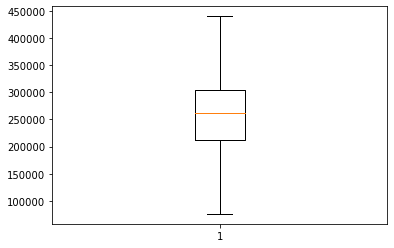

In [56]:
a.platelets[a.platelets>pupper_extreme]=pupper_extreme
a.platelets[a.platelets<plower_extreme]=plower_extreme
plt.boxplot(a.platelets)

<H1>Serum Creatinine</H1>

{'whiskers': [<matplotlib.lines.Line2D at 0x22c1a1e2160>,
 'caps': [<matplotlib.lines.Line2D at 0x22c1a1e2880>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c1a1d2d90>],
 'medians': [<matplotlib.lines.Line2D at 0x22c1a1e2fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c1a1ed370>],
 'means': []}

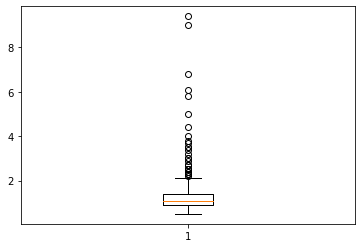

In [57]:
plt.boxplot(a.serum_creatinine)

In [58]:
sQ1=a.serum_creatinine.quantile(0.25)
print(sQ1)
sQ2=a.serum_creatinine.quantile(0.50)
print(sQ2)
sQ3=a.serum_creatinine.quantile(0.75)
print(sQ3)
sIQR=sQ3-sQ1
print(sIQR)
supper_extreme=sQ3+1.5*sIQR
print(supper_extreme)
slower_extreme=sQ1-1.5*sIQR
print(slower_extreme)

0.9
1.1
1.4
0.4999999999999999
2.1499999999999995
0.15000000000000024


C:\Users\SANJAY\AppData\Local\Temp/ipykernel_1584/726827752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.serum_creatinine[a.serum_creatinine>supper_extreme]=supper_extreme
C:\Users\SANJAY\AppData\Local\Temp/ipykernel_1584/726827752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.serum_creatinine[a.serum_creatinine<slower_extreme]=slower_extreme


{'whiskers': [<matplotlib.lines.Line2D at 0x22c1a238f10>,
 'caps': [<matplotlib.lines.Line2D at 0x22c1b218670>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c1a238b80>],
 'medians': [<matplotlib.lines.Line2D at 0x22c1b218d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c1b225160>],
 'means': []}

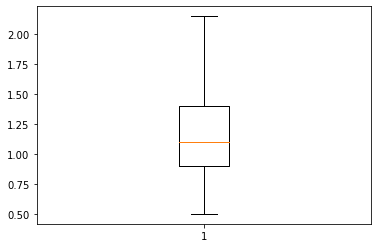

In [59]:
a.serum_creatinine[a.serum_creatinine>supper_extreme]=supper_extreme
a.serum_creatinine[a.serum_creatinine<slower_extreme]=slower_extreme
plt.boxplot(a.serum_creatinine)

<H1>Serum Sodium</H1>

{'whiskers': [<matplotlib.lines.Line2D at 0x22c1b274b50>,
 'caps': [<matplotlib.lines.Line2D at 0x22c1b2832b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c1b2747c0>],
 'medians': [<matplotlib.lines.Line2D at 0x22c1b2839d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c1b283d60>],
 'means': []}

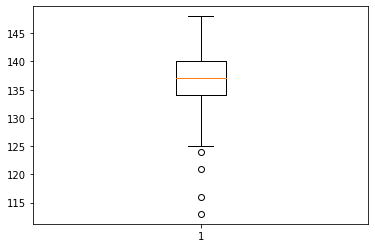

In [60]:
plt.boxplot(a.serum_sodium)

<H1>Sex</H1>

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

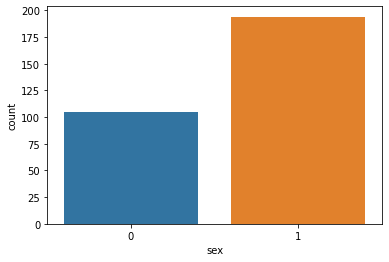

In [61]:
sns.countplot(a.sex)

<H1>Smoking</H1>

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking', ylabel='count'>

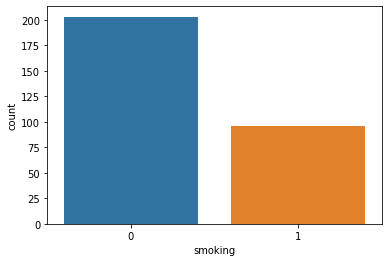

In [62]:
sns.countplot(a.smoking)

<H1>Death Event</H1>

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

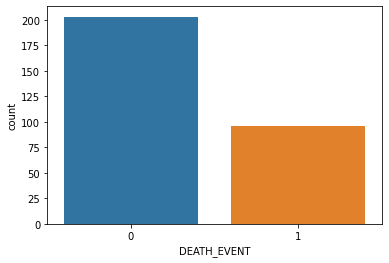

In [63]:
sns.countplot(a.DEATH_EVENT)

<H1>Creating Model</H1>

In [64]:
y=a.DEATH_EVENT
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


In [65]:
x=a.drop(['anaemia','diabetes','high_blood_pressure','smoking','sex','time','DEATH_EVENT'],axis=1)
print(x)

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                    582.00                 20  265000.00   
1    55.0                   1280.25                 38  263358.03   
2    65.0                    146.00                 20  162000.00   
3    50.0                    111.00                 20  210000.00   
4    65.0                    160.00                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                     61.00                 38  155000.00   
295  55.0                   1280.25                 38  270000.00   
296  45.0                   1280.25                 60  440000.00   
297  45.0                   1280.25                 38  140000.00   
298  50.0                    196.00                 45  395000.00   

     serum_creatinine  serum_sodium  
0                1.90           130  
1                1.10           136  
2                1.30           129  
3                1.

In [66]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)
print(train_x)
print(test_x)
print(train_y)
print(test_y)

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
118  65.0                    113.00                 60  203000.00   
288  65.0                    892.00                 35  263358.03   
59   72.0                    364.00                 20  254000.00   
69   65.0                    113.00                 25  440000.00   
160  66.0                     72.00                 40  242000.00   
..    ...                       ...                ...        ...   
66   42.0                    250.00                 15  213000.00   
53   70.0                     69.00                 50  351000.00   
79   55.0                    336.00                 45  324000.00   
280  70.0                   1280.25                 40  241000.00   
8    65.0                    157.00                 65  263358.03   

     serum_creatinine  serum_sodium  
118              0.90           140  
288              1.10           142  
59               1.30           136  
69               1.

In [74]:
model=LogisticRegression().fit(train_x,train_y)

In [75]:
predicted_values=model.predict(test_x)
print(predicted_values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [69]:
probability=model.predict_proba(test_x)
print(probability)

[[0.63320321 0.36679679]
 [0.64424398 0.35575602]
 [0.75816109 0.24183891]
 [0.7208002  0.2791998 ]
 [0.55326984 0.44673016]
 [0.65703733 0.34296267]
 [0.67949042 0.32050958]
 [0.65956836 0.34043164]
 [0.68981922 0.31018078]
 [0.5979254  0.4020746 ]
 [0.70232179 0.29767821]
 [0.77527016 0.22472984]
 [0.73473746 0.26526254]
 [0.65002772 0.34997228]
 [0.62003495 0.37996505]
 [0.66083111 0.33916889]
 [0.5532703  0.4467297 ]
 [0.60467144 0.39532856]
 [0.7498101  0.2501899 ]
 [0.77527092 0.22472908]
 [0.67725503 0.32274497]
 [0.66523254 0.33476746]
 [0.65322151 0.34677849]
 [0.64681865 0.35318135]
 [0.68010373 0.31989627]
 [0.65194522 0.34805478]
 [0.64938615 0.35061385]
 [0.69996271 0.30003729]
 [0.67022798 0.32977202]
 [0.6813267  0.3186733 ]
 [0.64230541 0.35769459]
 [0.60197745 0.39802255]
 [0.55327008 0.44672992]
 [0.67725443 0.32274557]
 [0.68376554 0.31623446]
 [0.71624707 0.28375293]
 [0.63906591 0.36093409]
 [0.70290919 0.29709081]
 [0.68193811 0.31806189]
 [0.6602     0.3398    ]


In [72]:
model.score(test_x,test_y)

0.65

In [73]:
confusion_matrix(test_y,predicted_values)

array([[39,  0],
       [21,  0]], dtype=int64)

<H1>Hypothesis Test</H1>

In [82]:
anae=pd.crosstab(a.anaemia,a.DEATH_EVENT)
stats.chi2_contingency(anae)

(1.042175485287005,
 0.3073160508415107,
 1,
 array([[115.4180602,  54.5819398],
        [ 87.5819398,  41.4180602]]))

In [83]:
dia=pd.crosstab(a.diabetes,a.DEATH_EVENT)
stats.chi2_contingency(dia)

(0.0,
 1.0,
 1,
 array([[118.13377926,  55.86622074],
        [ 84.86622074,  40.13377926]]))

In [84]:
pressure=pd.crosstab(a.high_blood_pressure,a.DEATH_EVENT)
stats.chi2_contingency(pressure)

(1.5434607612967581,
 0.21410341199416902,
 1,
 array([[131.71237458,  62.28762542],
        [ 71.28762542,  33.71237458]]))

In [85]:
s=pd.crosstab(a.sex,a.DEATH_EVENT)
stats.chi2_contingency(s)

(0.0,
 1.0,
 1,
 array([[ 71.28762542,  33.71237458],
        [131.71237458,  62.28762542]]))

In [86]:
smo=pd.crosstab(a.smoking,a.DEATH_EVENT)
stats.chi2_contingency(smo)

(0.007331473567119502,
 0.9317652998235507,
 1,
 array([[137.82274247,  65.17725753],
        [ 65.17725753,  30.82274247]]))